In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido

In [2]:
data=pd.read_csv("behavioural_dataset.csv")
data.describe

<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       200000

In [3]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [4]:
data.rename(columns={'Personal loan':'Car_loan'},inplace=True)
data.rename(columns={'Price':'EV_price'},inplace=True)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_loan,Total Salary,EV_price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


<AxesSubplot:xlabel='Marrital Status', ylabel='count'>

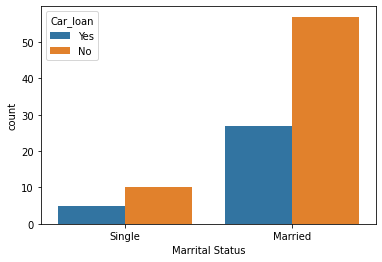

In [5]:
sns.countplot(x='Marrital Status',hue='Car_loan',data=data)

In [6]:
(data['Marrital Status'].value_counts()['Married'])/((data['Marrital Status'].value_counts()['Married'])+(data['Marrital Status'].value_counts()['Single']))*100

84.84848484848484

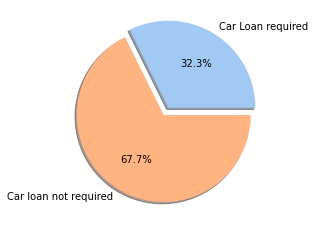

In [7]:
# getting label and data
labels=['Car Loan required','Car loan not required']
Loan_status=[data.query('Car_loan == "Yes"').Car_loan.count(),data.query('Car_loan == "No"').Car_loan.count()]

# declaring exploding pie
explode =[0.1, 0]
# define seaborn color palette to use
palette_color=sns.color_palette('pastel')


# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow="True",explode=explode,autopct='%1.1f%%')
# display chart
plt.show()

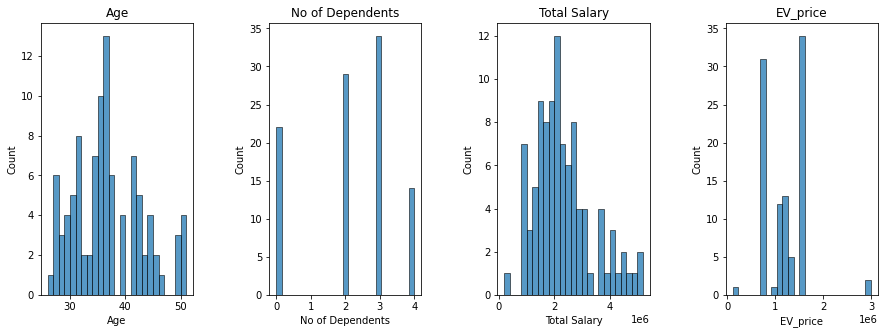

In [8]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age','No of Dependents','Total Salary','EV_price']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.histplot(data[x],bins=25)
    plt.title(f'{x}')
plt.show()

In [9]:
from kmodes.kprototypes import KPrototypes

In [10]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_loan,Total Salary,EV_price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [11]:
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values

In [12]:
cluster_data[:,0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [13]:
cluster_data[:, 0] = cluster_data[:,0].astype(float)
cluster_data[:, 4] = cluster_data[:,4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

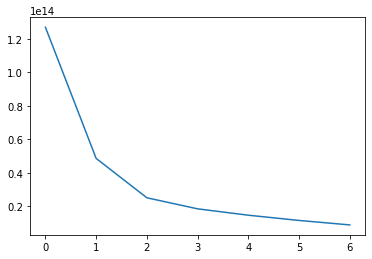

In [14]:
cost=[]
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters= num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)
    
plt.plot(cost)

In [15]:
cost

[126979657487180.34,
 48616816198579.65,
 25087753148183.234,
 18491809410726.285,
 14682459816808.33,
 11550465651449.916,
 8882669590289.023]

In [16]:
kproto=KPrototypes(n_clusters=2, verbose=2, max_iter=20)
clusters= kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 35, ncost: 60593966305440.77
Run: 1, iteration: 2/20, moves: 20, ncost: 50447073534650.24
Run: 1, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 1, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 11, ncost: 50057040964014.66
Run: 2, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 26, ncost: 49112753191986.05
Run: 3, iteration: 2/20, moves: 3, ncost: 48631729380526.18
Run: 3, iteration: 3/20, moves: 0, ncost: 48631729380526.18
Init: initializing c

In [17]:
# Appending the cluster data

data['Cluster']=clusters

In [18]:
data.EV_price.mean()

1194040.4040404041

In [19]:
data.EV_price[data.Cluster==0].mean()

1021267.6056338028

In [20]:
data.EV_price[data.Cluster==1].max()

3000000

In [21]:
data.EV_price[data.Cluster==1].mean()

1632142.857142857

In [22]:
data['Cluster'].value_counts(normalize=True)*100

0    71.717172
1    28.282828
Name: Cluster, dtype: float64

In [23]:
cluster_0=data[data.Cluster==0]
cluster_1=data[data.Cluster==1]

In [24]:
data['Cluster'].value_counts()

0    71
1    28
Name: Cluster, dtype: int64

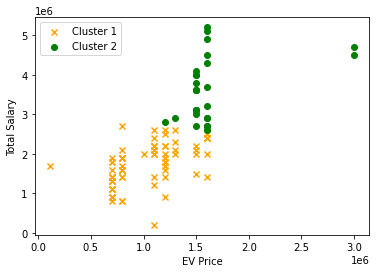

In [25]:
# plotting the effect of salary and ev price on cluster data

plt.scatter(cluster_0.EV_price, cluster_0['Total Salary'], color='orange', marker='x',label='Cluster 1')
plt.scatter(cluster_1.EV_price, cluster_1['Total Salary'],color='green',label='Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total Salary')
plt.show()

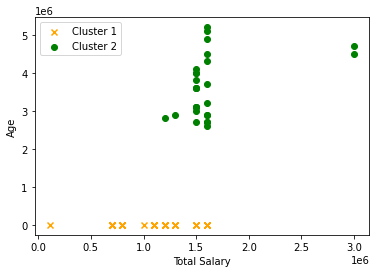

In [32]:
plt.scatter(cluster_0.EV_price, cluster_0['Age'],color='orange',marker='x',label='Cluster 1')
plt.scatter(cluster_1.EV_price, cluster_1['Total Salary'],color='green',label='Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('Total Salary')
plt.ylabel('Age')
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D

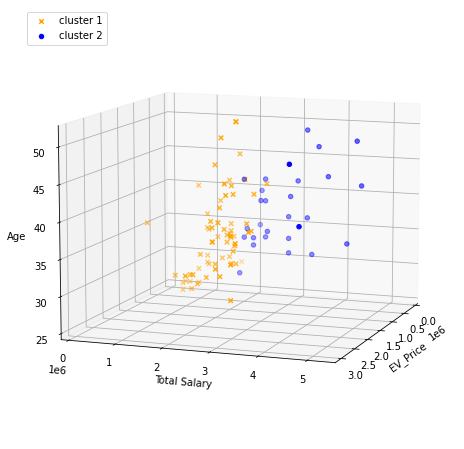

In [28]:
# plotting influence of age

fig= plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')

ax.scatter(cluster_0.EV_price, cluster_0['Total Salary'],cluster_0['Age'], color='orange',marker='x',label='cluster 1')
ax.scatter(cluster_1.EV_price, cluster_1['Total Salary'], cluster_1['Age'],color='blue',label='cluster 2')
plt.legend(loc="upper left")

ax.view_init(10,20)

plt.xlabel("EV_Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

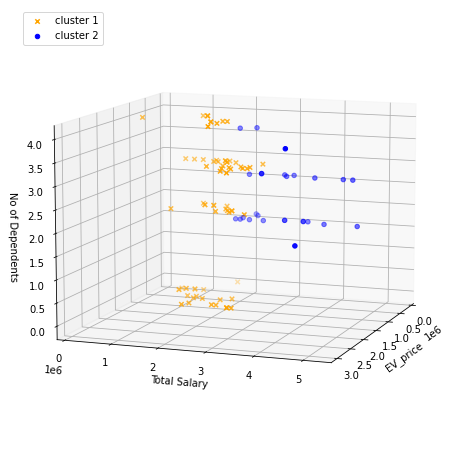

In [29]:
# plotting influence of No of Dependents

fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(111, projection='3d')

ax.scatter(cluster_0.EV_price,cluster_0['Total Salary'], cluster_0['No of Dependents'], color='orange',marker='x',label='cluster 1')
ax.scatter(cluster_1.EV_price, cluster_1['Total Salary'],cluster_1['No of Dependents'], color='blue',label='cluster 2')
plt.legend(loc="upper left")
ax.view_init(10,20)

plt.xlabel("EV_price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

In [30]:
data['No of Dependents'].value_counts()

3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64

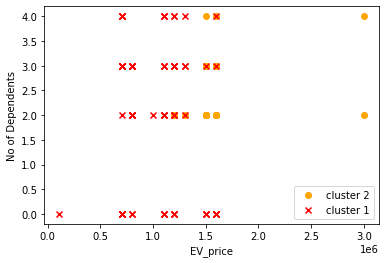

In [31]:
# plotting the effect of no of dependents and ev price on cluster data

plt.scatter(cluster_1.EV_price, cluster_1['No of Dependents'],color='orange',label='cluster 2')
plt.scatter(cluster_0.EV_price, cluster_0['No of Dependents'],color='red',marker='x',label='cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV_price')
plt.ylabel('No of Dependents')
plt.show()